In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../data/train_small.csv")
test = pd.read_csv("../data/test_fe.csv")

In [3]:
train.head()

,temperature,humidity,light,co2,humidityratio,target
0,0.530266,0.850894,0.0,0.778661,0.837370,0.0
1,0.314770,0.633058,0.0,0.415662,0.550666,0.0
2,0.072639,0.035636,0.0,0.007284,0.017525,0.0
3,0.217918,0.149373,0.0,0.099513,0.158298,0.0
4,0.072639,0.030942,0.0,0.011285,0.014351,0.0


In [4]:
test.head()

,temperature,humidity,light,co2,humidityratio,target
0,0.748184,0.393705,0.344557,0.478995,0.606309,1.0
1,0.610775,0.353961,0.404036,0.542447,0.500649,1.0
2,0.131961,0.048013,0.000000,0.032829,0.050657,0.0
3,0.460048,0.667556,0.322286,0.804309,0.657110,1.0
4,0.329298,0.660443,0.000000,0.460528,0.578445,0.0


In [5]:
x_train_use, y_train_use= train.drop('target', axis=1), train['target']

In [6]:
x_train,x_val, y_train, y_val=train_test_split(x_train_use, y_train_use, train_size=0.8, random_state=42)

In [7]:
x_train.shape

(1262, 5)

### Decision Tree Classifier

#### Max Depth 3

In [8]:
param_grid = {
    'max_depth': list(range(3, 7)),  
    'max_features': list(range(3, 9))  
}


In [9]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)


In [10]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [3, 4, 5, 6, 7, 8]})

In [11]:
best_param=grid_search.best_params_
best_model=grid_search.best_estimator_

In [12]:
best_param

{'max_depth': 5, 'max_features': 4}

In [13]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=4, random_state=42)

In [14]:
y_pred=best_model.predict(x_train)

In [15]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       616
         1.0       0.99      1.00      1.00       646

    accuracy                           1.00      1262
   macro avg       1.00      1.00      1.00      1262
weighted avg       1.00      1.00      1.00      1262



In [16]:
def plot_confusion_matrix(title,conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()
    plt.savefig("../conf/"+title+".png")

In [17]:
conf=confusion_matrix(y_train, y_pred)

<AxesSubplot:>

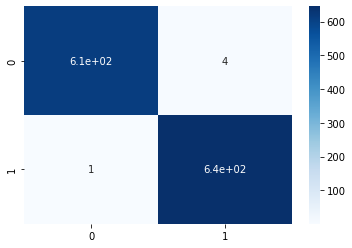

In [18]:
#plot_confusion_matrix("Decision_Tree_Classfier_Train",conf)
sns.heatmap(conf, annot=True, cmap= "Blues")

In [19]:
y_pred_val=best_model.predict(x_val)

In [20]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       173
         1.0       0.99      1.00      1.00       143

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316



In [21]:
conf_val=confusion_matrix(y_val, y_pred_val)

<AxesSubplot:>

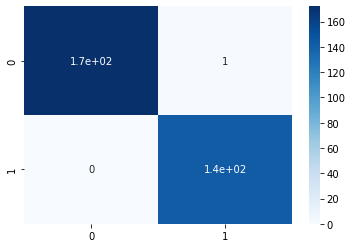

In [22]:
#plot_confusion_matrix("Decision_Tree_Classfier_Validate",conf_val)
sns.heatmap(conf_val, annot=True, cmap= "Blues")

### Extract Result

In [23]:
import time

start=time.time()

best_model.fit(x_train_use, y_train_use)

elapse=time.time()-start

In [24]:
pred_use= best_model.predict(x_train_use)

In [25]:
cross_val_score(best_model, x_train_use, y_train_use, scoring='f1')

array([0.99371069, 0.99047619, 0.99053628, 0.9968254 , 0.99684543])

In [26]:
print(classification_report(y_train_use, pred_use))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       789
         1.0       0.99      1.00      1.00       789

    accuracy                           1.00      1578
   macro avg       1.00      1.00      1.00      1578
weighted avg       1.00      1.00      1.00      1578



In [27]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [28]:
x_test, y_test= test.drop('target', axis=1), test['target']

In [29]:
pred_test=best_model.predict(x_test)

In [30]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       350
         1.0       0.96      1.00      0.98       183

    accuracy                           0.99       533
   macro avg       0.98      0.99      0.99       533
weighted avg       0.99      0.99      0.99       533



In [31]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [32]:
conf_test=confusion_matrix(y_test, pred_test)

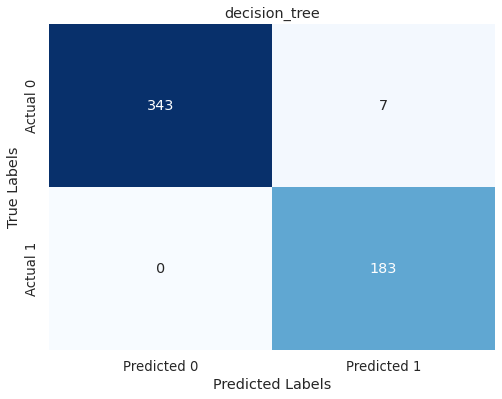

<Figure size 432x288 with 0 Axes>

In [33]:
plot_confusion_matrix("decision_tree",conf_test)

In [34]:
df=pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "Decision Tree"
df["elapsed"] = elapse

In [35]:
df.head()

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed
0,0.981233,0.996207,0.993695,0.963158,0.998733,1.0,Decision Tree,0.005822


In [36]:
df.to_csv("../results/regular/dtc.csv", index=False)